In [1]:
import logging
import numpy as np  
from gensim.models import Doc2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [16]:
import re 
import string
import unicodedata
import sys

tbl = dict.fromkeys(i for i in xrange(sys.maxunicode)
                      if unicodedata.category(unichr(i)).startswith('P') and i != 45 and i!= 95)

def vi_trans_unicode(su):
    return su.translate(tbl)

vpunctuation = string.punctuation.replace('-','').replace('_','')
print vpunctuation

def vi_strip_text(s):
    s = re.sub(r"&amp;", "", s)
    s = re.sub(u"\u2026", "", s, re.UNICODE) # ...
    s = re.sub(u"\u2014", "", s, re.UNICODE) # emdash
    s = re.sub(u"\u201d", "", s, re.UNICODE) #
    s = re.sub(u"\u201c", "", s, re.UNICODE) #
    s = re.sub(r"<([^>]+)>", "", s)
    s = re.sub(r"(\s|\\n|\\r|\\t)+", " ", s)
    s = re.sub("([%s]+)" % vpunctuation, " ", s)
    s = ' '.join([w if not w[0].isdigit() else u"_NUM" for w in s.strip().split()])
    return s

def vi_strip_text2(s):
    s = re.sub(r"&amp;", "", s)
    s = vi_trans_unicode(s)
    s = re.sub(r"<([^>]+)>", "", s)
    s = re.sub(r"(\s|\\n|\\r|\\t)+", " ", s)
    s = re.sub(r"__+", "_", s)
    s = re.sub(r"--+", "-", s)
    s = ' '.join([w if not w[0].isdigit() else u"_NUM" for w in s.strip().split()])
    return s

def vi_clean(line):
    words = line.replace('.',' ').strip().split()
    words = [w for w in words if not(u"_NUM" in w) and not(w.startswith(u'-'))]
    return ' '.join(words)

!"#$%&'()*+,./:;<=>?@[\]^`{|}~


In [3]:
import requests
from bs4 import BeautifulSoup

url_post = "http://vlsp.vietlp.org:8080/demo/?page=seg_pos_chunk"
header_post = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/4",
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8"
}

def tokenize_soup(soup):
    try:
        sentences = soup.findAll('div', {'class': "sentence"})
        toks = [ s.find('tr').findAll('td')[1:] for s in sentences]
        toks = [t.contents[0] for tok in toks for t in tok]
        return ' '.join(toks)
    except Exception, e:
        print e
        
def get_tokens(INPUT):
    try:
        payload = {r"input":INPUT}
        rsp = requests.post(url_post, data=payload, headers=header_post)
        soup = BeautifulSoup(rsp.content)
        return tokenize_soup(soup)
    except Exception, e:
        print e

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [5]:
model = Doc2Vec.load("/home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131")

INFO:gensim.utils:loading Doc2Vec object from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131
INFO:gensim.utils:loading docvecs recursively from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.docvecs.* with mmap=None
INFO:gensim.utils:loading doctag_syn0 from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.docvecs.doctag_syn0.npy with mmap=None
INFO:gensim.utils:loading syn1neg from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.syn1neg.npy with mmap=None
INFO:gensim.utils:loading syn0 from /home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131.syn0.npy with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.utils:setting ign

In [6]:
print model

Doc2Vec(dm/s,d200,n5,w8,mc2,s1e-05,t4)


In [7]:
model.init_sims(replace=True)

INFO:gensim.models.word2vec:precomputing L2-norms of word weight vectors


In [12]:
model.docvecs['r131_PD_0'].shape

(200,)

In [13]:
for w,v in model.most_similar([u"ô-liu"]):
    print w, v

ô_liu 0.864648461342
oliu 0.846231639385
hạnh_nhân 0.832529187202
ôliu 0.829264581203
Cà_chua 0.819293379784
bí_đỏ 0.811026573181
cần_tây 0.810770452023
Cà_rốt 0.809538602829
dâu_tây 0.804501652718
olive 0.801929056644


In [14]:
for w,v in model.most_similar([u"phản_động"]):
    print w, v

chống_phá 0.860351741314
xuyên_tạc 0.824813902378
Việt_Tân 0.792726516724
tay_sai 0.780650615692
mưu_đồ 0.763554632664
vu_khống 0.751157402992
bắt_bớ 0.742017626762
ngôn_luận 0.740430057049
thâm_độc 0.73834246397
vu_cáo 0.737820327282


In [15]:
print model.docvecs['r131_WK_0'].shape
print model.docvecs['r131_PD_0'].shape
print model.docvecs['r131_ZN_0'].shape
print model.docvecs['r131_TN_0'].shape
print model.docvecs['r131_VN_0'].shape

(200,)
(200,)
(200,)
(200,)
(200,)


In [17]:
vn_127 = u"""Sau khi được mở_rộng cầu Bình Triệu sẽ góp_phần giảm áp_lực lưu_thông qua_cầu Sài_Gòn tăng nhanh khả_năng thông_thương giữa TP HCM và các tỉnh miền Đông_Nam_Bộ Cũng nằm trong dự_án BOT cầu_đường Bình Triệu _NUM cầu Bình Triệu mới đã được đưa vào sử_dụng cuối tháng _NUM và cho xe lưu_thông theo chiều từ Bình_Dương về TP HCM Ông Trần Quang Phượng Giám_đốc Sở Giao_thông vận_tải TP HCM đánh_giá cầu Bình Triệu sau gần _NUM năm khai_thác đã dần xuống_cấp và có nguy_cơ sập bất cứ lúc nào nên việc trùng_tu là hết sức quan_trọng Theo đó CII đơn_vị chủ đầu_tư đã thuê nhà_thầu nước_ngoài là Công_ty Freyssinet Pháp nâng_cấp cầu cũ từ tải_trọng _NUM tấn lên thành _NUM tấn với _NUM làn xe _NUM làn dành cho ôtô và một làn dành cho xe hai bánh Kiên_Cường Ảnh Kiên_Cường Dự_án BOT cầu_đường Bình Triệu _NUM được khởi_động vào ngày _NUM gồm xây_dựng cầu Bình Triệu mới và sửa_chữa mở_rộng cầu cũ nhưng vì một_số lý_do khách_quan nên mới chỉ xây được cầu mới Dự_kiến dự_án sửa_chữa sẽ hoàn_thành trong _NUM tháng và thời_gian khai_thác là _NUM năm với tổng giá_trị khoảng gần _NUM t đồng Đơn_vị thi_công cam_kết trong thời_gian làm mới các phương_tiện vẫn lưu_thông bình_thường ở _NUM cầu theo hướng cũ từ TP HCM đi Bình_Dương Chúng_tôi sẽ thay toàn_bộ khe co_giãn cùng các gối cầu trải lại lớp nhựa làm hệ_thống chiếu_sáng Cầu cũng được mở_rộng từ _NUM m lên_NUM m Đồng_thời cầu cũng sẽ có khả_năng chịu động_đất cấp _NUM sau khi hoàn_thành đại_diện Công_ty Freyssinet nói về phương_án k thuật sửa_chữa Hôm_nay chúng_tôi sẽ triển_khai việc sữa chữa nâng_cấp và mở_rộng cầu cũ ông Lê Vũ Hoàng Tổng giám_đốc Công_ty cổ_phần đầu_tư hạ_tầng k thuật TP HCM CII cho_biết"""
vn_127 = vi_clean(vn_127)
vn_127_vec = model.infer_vector(vn_127.split())
for tag,v in model.docvecs.most_similar([vn_127_vec]):
    print tag,v

INFO:gensim.models.doc2vec:precomputing L2-norms of doc weight vectors


r131_TN_122645 0.597650170326
r131_VN_84801 0.593913137913
r131_VN_133173 0.59174156189
r131_TN_159596 0.585798680782
r131_VN_43747 0.575877308846
r131_VN_149899 0.574281573296
r131_TN_202910 0.57169675827
r131_TN_53710 0.571644186974
r131_TN_180849 0.571370840073
r131_TN_165892 0.566232085228


In [18]:
tn_127 = u"""Ý_định trồng ba_kích chợt lóe lên trong đầu người đàn_ông người C Tu này Ông nhiệt_tình cho giống hướng_dẫn cụ_thể cách trồng thu_hoạch với niềm_tin một ngày không xa sẽ có nhiều người miền_núi thoát nghèo vươn lên khá_giả đầy_đủ như mình Còn bây_giờ sau _NUM năm phát_triển và khá phổ_biến giá một ký ba_kích tươi đã lên đến _NUM đồng vậy mà còn không đủ để bán Ở xã Lăng nơi Bhríu Pố ở cũng đã có hơn _NUM gia_đình học_tập trồng ba_kích Ngoài dùng làm các vị_thuốc rượu ba_kích với nhiều tính_năng tuyệt_vời đã được nhiều người ưa_thích Hằng_ngày ông vẫn chân trần lội_suối vượt đồi để chăm_bẵm đồi ba_kích của mình Đằng_đẵng thời_gian dài đến lúc ba_kích lên tươi_tốt Bhríu Pố mới gọi bà_con đến xem Nhiều người vẫn nói quả đồi canh_tác của Bhríu Pố là đồi _NUM trong _NUM Lúc này mọi người mới tin cây của trời vẫn trồng được Mùa_thu hoạch ba_kích thường vào mùa_xuân tiết_trời mát Sau hơn _NUM năm gặp lại Bhríu Pố hào_hứng khoe đợt thu_hoạch vừa rồi ông trúng lớn Có hôm trời mưa nước lớn Bhríu Pố phải ngủ lại rừng Ông quyết_định vượt núi vào rừng đào ba_kích ròng_rã mấy tháng trời để về trồng TS Ngô Trại bảo đây là giống cây quý lắm có củ ở dưới người dân gọi là cây ruột gà Bây_giờ bất k ai đã từng đặt_chân đến vùng_đất Tây_Giang cũng đều cố_gắng có được một hũ rượu ba_kích mang về Với giá_thành hiện_tại chỉ làm một phép_tính sơ_sơ cũng đủ thấy đồi ba_kích của Bhríu Pố đang có giá_trị gần nửa tỉ đồng một giấc_mơ của nhiều người Làm_giàu nhờ trồng cây hiếm Thoát nghèo nhờ cây của trời _NUM Tôi Viết Chuyện Bhríu Pố giàu lên nhờ ba_kích loại cây quý_hiếm trong ngành dược_liệu VN trở_nên nổi_tiếng không chỉ ở Tây_Giang Quảng_Nam mà còn khắp các huyện miền_núi miền_Trung Chủ_tịch UBND huyện Tây_Giang Bhríu Liếc bộc_bạch Đất làm rẫy của người dân ngày_càng khó_khăn trong khi đó hiệu_quả kinh_tế của ba_kích thì thấy rõ nên huyện đã chủ_trương xác_định ba_kích sẽ là cây xóa đói giảm nghèo Năm _NUM lần đầu_tiên ba_kích tím được tìm thấy ở xã Lăng Tây_Giang Quảng_Nam trong chuyến đi thực_tế để tìm_kiếm các cây thuốc_nam của tiến_sĩ TS Ngô Trại Theo Giám_đốc Trung_tâm Y_tế huyện bác_sĩ Nguyễn Huy Thông huyện đã trồng được hơn _NUM gốc ở thôn PrNing Lúc trước khi ba_kích mới được tìm thấy một_vài người dân đi rừng đào được bán với giá _NUM đồng kg đến khi Bhríu Pố trồng được ba_kích giá đã nâng lên _NUM đồng kg Từ _NUM gốc ban_đầu hiện_nay số gốc ba_kích của Bhríu Pố đã lên đến hơn _NUM gốc Bhríu Pố nhớ như_in Mình cùng TS Ngô Trại lúc đang đi tham_khảo đất_nước rừng ở xã Lăng thì phát_hiện ra cây ba_kích ở trong một hốc núi Cả huyện trồng ba_kích Thấy mô_hình của Bhríu Pố hiệu_quả nhiều người dân kể_cả cán_bộ các huyện miền_núi khác như A_Lưới Thừa_Thiên_Huế Trà_My Nam_Giang Quảng_Nam đến học_hỏi Không chỉ trồng ươm giống tại hợp_tác_xã huyện Tây_Giang còn khuyến_khích người dân trồng loại cây này trên cơ_sở huyện sẽ cung_cấp giống miễn_phí gia_đình nào có _NUM ha ba_kích còn được thưởng _NUM triệu đồng Thậm chí họ còn bảo Bhríu Pố bị điên vì Đây là cây của trời mọc trong rừng chứ không phải của người không trồng được Nhưng khi bàn_bạc với mọi người trong thôn ai cũng phản_đối Bán tin bán nghi mình đào lên thì thấy có củ thật Ba_kích ưa bóng_râm nên trên đồi ba_kích Bhríu Pố trồng xen_kẽ cây sắn cau kiểng và cây ăn quả Qua tìm_hiểu sách_vở Bhríu Pố mới biết hết công_dụng tuyệt_vời của ba_kích"""
tn_127 = vi_clean(tn_127)
tn_127_vec = model.infer_vector(tn_127.split())
for tag,v in model.docvecs.most_similar([tn_127_vec]):
    print tag,v

r131_VN_92086 0.661446213722
r131_VN_148027 0.658583521843
r131_VN_168294 0.652355611324
r131_VN_147212 0.640873730183
r131_VN_165805 0.63979268074
r131_VN_158169 0.638164460659
r131_VN_175287 0.633736729622
r131_VN_127757 0.631079554558
r131_VN_142804 0.623704433441
r131_VN_132493 0.622422516346


In [86]:
zn_127 = u"""Ngoài ra Mùa_xuân đầu_tiên còn có câu_chuyện của thế_hệ trẻ Việt_Nam hôm_nay những người chịu trách_nhiệm bảo_vệ hòa_bình và dựng_xây đất_nước khi nhớ lại những chiến_công hào_hùng của dân_tộc Ngày _NUM miền_Nam Việt_Nam hoàn_toàn được giải_phóng Mùa_xuân đầu_tiên là chương_trình nghệ_thuật đặc_biệt là khúc tráng_ca gửi đến biết bao thế_hệ người Việt_Nam đã anh_hùng chiến_đấu vì độc_lập và tự_do cho dân_tộc Câu_chuyện và cảm_xúc của các nhân_chứng trong chiến_tranh như phóng_viên chiến_trường Patrick Chauvel ông Trần Quang Cơ nguyên thành_viên phái_đoàn đàm_phán Hiệp_định Hòa_bình Paris Đại_tướng Lê Đức Anh cũng được chia_sẻ Chiến_tranh đã lùi xa đất_nước hòa_bình thống_nhất song ký_ức về những ngày_tháng hành_quân ra_trận cùng chiến_thắng hào_hùng của quân và dân ta trong Đại_thắng mùa_xuân _NUM vẫn luôn khắc sâu trong tim mỗi người Việt_Nam Chương_trình được tổ_chức tại hai đầu cầu Nhà thi_đấu Nguyễn Du TP HCM và Trường_quay ngoài_trời của Đài truyền_hình Việt_Nam tại Hà_Nội với sự tham_gia của nhiều nghệ_sĩ ca_sĩ nổi_tiếng như Trọng Tấn Văn Mai Hương Nguyên Thảo Uyên Linh Mùa_xuân đầu_tiên sẽ được phát_sóng trực_tiếp trên VTV_NUM vào lúc _NUMh ngày _NUM Truyền_hình VTV tổ_chức cầu truyền_hình k niệm Giải_phóng miền_Nam Nhân dịp k niệm _NUM năm giải_phóng miền_Nam thống_nhất Đất_nước Đài truyền_hình Việt_Nam thực_hiện cầu truyền_hình trực_tiếp _NUM miền_Nam Bắc mang tên Mùa_xuân đầu_tiên Ảnh AP Trong chương_trình khán_giả sẽ được gặp nhiều khách_mời là các chiến_sĩ cách_mạng những người từng đi qua chiến_tranh với biết bao xương_máu và nước mắt và cả nhiều người con xa quê_hương cố_gắng trở_về trong ngày độc_lập Bình_thường Thông_tin hữu_ích nội_dung không lỗi Thông_tin nhanh nội_dung trung_thực và khách_quan Kém Nội_dung không có giá_trị nhiều lỗi Non_sông Việt_Nam quy về một mối sau _NUM năm chia_cắt Bài_viết được cập_nhật lần cuối lúc _NUM Tiểu Uyên VTV_NUM Giải_phóng miền_Nam thống_nhất đất_nước ĐÁNH_GIÁ BÀI_VIẾT Giúp Zing vn ngày_càng nâng_cao chất_lượng nội_dung bằng cách cho chúng_tôi biết bạn đánh_giá thế nào về bài_viết này Rất tốt"""
zn_127 = vi_clean(zn_127)
print zn_127
print 
zn_127_vec = model.infer_vector(zn_127.split())
for tag,v in model.docvecs.most_similar([zn_127_vec]):
    print tag,v

Ngoài ra Mùa_xuân đầu_tiên còn có câu_chuyện của thế_hệ trẻ Việt_Nam hôm_nay những người chịu trách_nhiệm bảo_vệ hòa_bình và dựng_xây đất_nước khi nhớ lại những chiến_công hào_hùng của dân_tộc Ngày miền_Nam Việt_Nam hoàn_toàn được giải_phóng Mùa_xuân đầu_tiên là chương_trình nghệ_thuật đặc_biệt là khúc tráng_ca gửi đến biết bao thế_hệ người Việt_Nam đã anh_hùng chiến_đấu vì độc_lập và tự_do cho dân_tộc Câu_chuyện và cảm_xúc của các nhân_chứng trong chiến_tranh như phóng_viên chiến_trường Patrick Chauvel ông Trần Quang Cơ nguyên thành_viên phái_đoàn đàm_phán Hiệp_định Hòa_bình Paris Đại_tướng Lê Đức Anh cũng được chia_sẻ Chiến_tranh đã lùi xa đất_nước hòa_bình thống_nhất song ký_ức về những ngày_tháng hành_quân ra_trận cùng chiến_thắng hào_hùng của quân và dân ta trong Đại_thắng mùa_xuân vẫn luôn khắc sâu trong tim mỗi người Việt_Nam Chương_trình được tổ_chức tại hai đầu cầu Nhà thi_đấu Nguyễn Du TP HCM và Trường_quay ngoài_trời của Đài truyền_hình Việt_Nam tại Hà_Nội với sự tham_gia củ

In [21]:
model.docvecs[u"r131_TN_{}".format(27463)].shape

(200,)

In [22]:
model.docvecs.most_similar([u"r131_TN_27463"])

[(u'r131_TN_40496', 0.815109372138977),
 (u'r131_TN_32346', 0.8070976138114929),
 (u'r131_TN_40452', 0.8070247173309326),
 (u'r131_TN_17189', 0.8063002824783325),
 (u'r131_TN_37593', 0.8060518503189087),
 (u'r131_TN_23304', 0.7941065430641174),
 (u'r131_TN_53718', 0.7924285531044006),
 (u'r131_TN_30160', 0.792174756526947),
 (u'r131_TN_44330', 0.7909091711044312),
 (u'r131_TN_10397', 0.7904873490333557)]

In [23]:
new_doc = u"chúng_tôi là nhà đầu_tư chân_chính"
new_v = model.infer_vector(new_doc.split())
for w,v in model.docvecs.most_similar([new_v]):
    print w,v

r131_VN_166558 0.422751992941
r131_VN_44675 0.42151466012
r131_VN_19981 0.418646335602
r131_TN_152999 0.418032944202
r131_VN_191560 0.417789757252
r131_VN_111043 0.415475279093
r131_TN_238209 0.407173782587
r131_TN_145178 0.406718850136
r131_TN_226764 0.403209328651
r131_VN_139560 0.39447748661


## X,y

In [24]:
N_NUM = 30000
pos_posts = []
for i in range(N_NUM):
    v = model.docvecs["r131_PD_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        pos_posts.append(v)
    else:
        pass

In [25]:
print len(pos_posts)

30000


In [26]:
neg_posts = []

for i in range(N_NUM):
    if i % 3 == 0:
        v = model.docvecs["r131_TN_{}".format(i)]
    elif i % 3 == 1:
        v = model.docvecs["r131_VN_{}".format(i)]
    else:
        v = model.docvecs["r131_ZN_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        neg_posts.append(v)
    else:
        pass
print len(neg_posts)

30000


In [28]:
N_TRAIN = 25000
X = np.vstack((np.array(pos_posts[:N_TRAIN]), np.array(neg_posts[:N_TRAIN])))
y = np.hstack((np.ones(N_TRAIN), np.zeros(N_TRAIN)))

print X.shape, y.shape

(50000, 200) (50000,)


In [29]:
X_test = np.vstack((np.array(pos_posts[N_TRAIN:]), np.array(neg_posts[N_TRAIN:])))
y_test = np.hstack((np.ones(len(pos_posts) - N_TRAIN), np.zeros(len(neg_posts) - N_TRAIN)))
print X_test.shape, y_test.shape

(10000, 200) (10000,)


## EDA

In [30]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

In [31]:
columns = ["D_{:02d}".format(i+1) for i in range(200)]
df = pd.DataFrame.from_records(X, columns=columns)

In [32]:
df.head()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
0,-0.006725,-0.009468,0.011254,-0.012343,-0.011678,0.014495,-0.015367,-0.007005,0.006640,-0.003059,-0.015818,-0.005084,-0.020421,-0.007111,0.011949,-0.010775,0.007778,-0.018290,-0.003093,-0.013949,-0.001046,0.000379,0.007692,-0.007614,-0.012264,-0.027155,0.013408,0.010243,0.000854,-0.000166,-0.004432,-0.001643,-0.007860,-0.006177,0.006529,-0.007864,0.011208,-0.023336,0.010755,-0.001041,0.009001,-0.018099,0.009269,-0.012626,-0.015463,-0.005204,0.022643,0.008916,0.011239,0.019584,-0.015172,-0.005200,0.004194,0.002175,-0.000851,0.005664,-0.001401,-0.014434,0.012587,-0.006210,0.009766,0.004181,0.000559,-0.006181,-0.009072,-0.003774,0.013296,-0.013502,-0.000275,0.009610,0.008279,-0.011365,-0.012938,0.011249,0.007407,0.010783,0.015212,0.010935,0.009113,0.004710,-0.002757,0.006580,0.015863,0.007274,-0.008146,-0.018954,-0.016113,0.010466,0.011119,-0.000756,-0.025450,-0.003167,0.017377,-0.013768,0.012197,0.005428,0.009395,-0.009218,0.007457,-0.013073,-0.004964,0.000097,-0.005531,-0.013925,-0.004201,0.002907,-0.002003,-0.018806,0.019169,-0.006701,0.004102,0.002422,-0.005692,-0.012166,-0.000832,0.003119,0.007065,0.001763,-0.010971,0.004237,-0.015765,-0.020129,0.008112,-0.004268,0.011205,0.002115,-0.013785,-0.016742,-0.002708,-0.016488,-0.019015,-0.009209,0.006047,0.006963,0.001088,-0.014820,-0.003047,-0.005048,-0.002667,-0.000999,-0.024524,-0.003722,-0.005858,-0.003504,0.000390,-0.017356,-0.006881,0.021577,0.012970,-0.011914,0.005806,-0.007172,0.004857,-0.002815,0.010084,0.005019,0.017334,0.000256,-0.011323,-0.003471,0.002365,-0.016842,0.029338,0.012240,-0.000236,0.000089,-0.007454,-0.009108,-0.010443,-0.016214,0.008229,-0.017725,-0.001733,-0.011305,0.011908,0.004253,-0.007911,0.000910,0.012745,0.023351,-0.010002,-0.000615,-0.000961,-0.028683,-0.010123,-0.017382,-0.009582,-0.013018,0.012087,-0.003471,-0.015940,0.018131,-0.011186,-0.012047,-0.006839,-0.012376,-0.005039,-0.007914,-0.013850,-0.004197
1,0.010960,-0.005867,0.012412,0.003366,-0.032868,0.005271,-0.030867,0.009874,0.003927,0.020973,-0.000202,-0.009773,-0.002910,0.011743,0.023285,-0.018096,-0.012654,-0.032890,-0.002167,0.000927,0.000299,0.025896,-0.012542,-0.016501,-0.004342,0.002879,-0.004333,0.025587,-0.011625,0.013105,0.002821,-0.000816,0.035352,-0.007802,0.005703,-0.020206,0.030027,-0.017204,0.010515,-0.026783,0.039334,-0.005763,0.005328,-0.031831,-0.011831,-0.000836,0.000340,0.023705,0.020703,-0.005682,-0.024464,-0.004102,-0.000530,-0.002585,-0.004953,0.008169,-0.017375,-0.003276,0.057071,0.016106,0.005473,-0.002355,-0.001566,0.012358,-0.026606,-0.014601,0.024057,0.019315,0.008707,-0.020016,0.018641,-0.018468,0.021714,0.020097,-0.004127,0.026561,0.010154,-0.001816,0.018420,0.026568,-0.011095,0.020203,0.019318,-0.005098,-0.017002,-0.021514,-0.000674,-0.004767,0.017466,0.003971,0.011357,-0.030172,-0.001184,0.033012,0.026023,0.006597,0.000028,-0.014603,0.022127,-0.005362,0.012003,-0.003252,0.00069

In [33]:
df.describe()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.004585,0.001285,-0.005877,-0.007147,-0.013805,-0.002589,-0.012455,-0.002241,0.001707,-0.000917,0.000305,-0.000067,-0.000663,-0.003636,0.013226,-0.008524,-0.001336,-0.011960,0.002935,0.000316,0.004612,0.006710,0.005349,-0.005266,-0.007282,-0.003143,-0.000758,-0.005514,-0.013444,-0.002

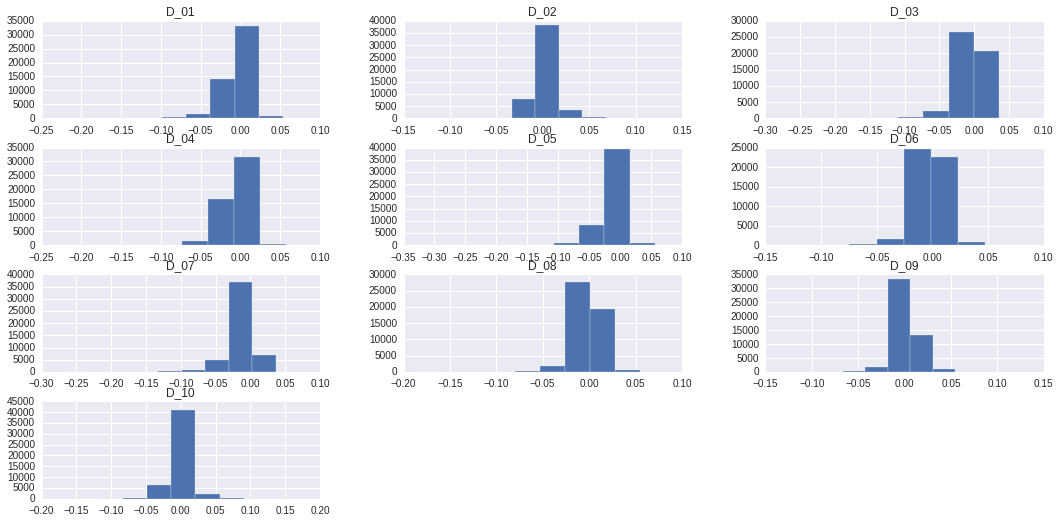

In [34]:
df[columns[:10]].hist(figsize=(16,8))
plt.show()

## Model

In [35]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

def stratified_cv2(X, y, clf, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

def stratified_cv3(X, y, clf, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return clf

> Train on X

In [36]:
lr = linear_model.LogisticRegression()
rf = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=127)
gbc = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=127)
svc = svm.LinearSVC(random_state=127)

# cls = [lr, rf, gbc, svc]
# cls_names = ["Logistic Regression", "Random Forest", "Gradient Boosting Trees", "Support Vector Machines"]
cls = [lr, rf]
cls_names = ["Logistic Regression", "Random Forest"]

print "[*] CV on 10 folds"
for i, clf in enumerate(cls):
    print "CV on {}".format(cls_names[i])
    cls[i] = stratified_cv3(X,y, clf)

[*] CV on 10 folds
CV on Logistic Regression
CV on Random Forest


In [37]:
print "[*] Score of CV on 10 folds"
for i, clf in enumerate(cls):
    print('{}:           {:.2f}\n'.format(cls_names[i], metrics.accuracy_score(y, cls[i].predict(X))))

[*] Score of CV on 10 folds
Logistic Regression:           0.93

Random Forest:           1.00



In [44]:
svc = stratified_cv3(X,y, svc)
print('{}:           {:.2f}\n'.format("Support Vector Machines", metrics.accuracy_score(y, svc.predict(X))))

Support Vector Machines:           0.94



In [38]:
from sklearn.externals import joblib

In [39]:
lr, rf = cls

In [40]:
print lr
print rf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=127, verbose=0, warm_start=False)


In [87]:
# joblib.dump(lr, "/home/laampt/orm/10K/5K/model/lr_30Ktrain_cv10_r131.pkl")
# joblib.dump(rf, "/home/laampt/orm/10K/5K/model/rf_30Ktrain_cv10_r131.pkl")
# joblib.dump(svc, "/home/laampt/orm/10K/5K/model/svc_30Ktrain_cv10_r131.pkl")

['/home/laampt/orm/10K/5K/model/svc_30Ktrain_cv10_r131.pkl',
 '/home/laampt/orm/10K/5K/model/svc_30Ktrain_cv10_r131.pkl_01.npy',
 '/home/laampt/orm/10K/5K/model/svc_30Ktrain_cv10_r131.pkl_02.npy',
 '/home/laampt/orm/10K/5K/model/svc_30Ktrain_cv10_r131.pkl_03.npy']

In [ ]:
lr = joblib.load("/home/laampt/orm/10K/5K/model/lr_30Ktrain_cv10_r131.pkl")
rf = joblib.load("/home/laampt/orm/10K/5K/model/rf_30Ktrain_cv10_r131.pkl")
svc = joblib.load("/home/laampt/orm/10K/5K/model/svc_30Ktrain_cv10_r131.pkl")

In [ ]:
print lr

In [ ]:
print rf

In [ ]:
print gbc

In [ ]:
print svc

> Test on X_test

In [64]:
def voting_result(test_doc):
    test_vec = model.infer_vector(test_doc.split())
    is_black_lr = lr.predict(test_vec)
    is_black_rf = rf.predict(test_vec)
    is_black_gbc = gbc.predict(test_vec)
    is_black_svc = svc.predict(test_vec)
    return u"""{} \n is [{}] by Logistic Regression | [{}] by Random Forest | [{}] by GBC | [{}] by SVC""".format(test_doc,is_black_lr, is_black_rf, is_black_gbc, is_black_svc)

def voting_result2(test_doc):
    test_vec = model.infer_vector(test_doc.split())
    is_black_lr = lr.predict(test_vec)
    is_black_rf = rf.predict(test_vec)
    is_black_gbc = gbc.predict(test_vec)
    is_black_svc = svc.predict(test_vec)
    return u"""Voting is [{}] by Logistic Regression | [{}] by Random Forest | [{}] by GBC | [{}] by SVC""".format(is_black_lr, is_black_rf, is_black_gbc, is_black_svc)

def voting_result3(test_doc):
    test_vec = model.infer_vector(test_doc.split())
    is_black_lr = lr.predict(test_vec)
    is_black_rf = rf.predict(test_vec)
    is_black_svc = svc.predict(test_vec)
    return u"""{} \n is [{}] by Logistic Regression | [{}] by Random Forest | [{}] by SVC""".format(test_doc,is_black_lr, is_black_rf, is_black_svc)

def print_sum_test_vec(test_doc):
    test_vec = model.infer_vector(test_doc.split())
    return np.sum(test_vec)

def voting_vec(test_vec):
    is_black_lr = lr.predict(test_vec)
    is_black_rf = rf.predict(test_vec)
    is_black_gbc = gbc.predict(test_vec)
    is_black_svc = svc.predict(test_vec)
    return u"""Voting is [{}] by Logistic Regression | [{}] by Random Forest | [{}] by GBC | [{}] by SVC""".format(is_black_lr, is_black_rf, is_black_gbc, is_black_svc)

def voting_vec2(test_vec):
    is_black_lr = lr.predict(test_vec)
    is_black_rf = rf.predict(test_vec)
    is_black_gbc = gbc.predict(test_vec)
    is_black_svc = svc.predict(test_vec)
    return (is_black_lr, is_black_rf, is_black_gbc, is_black_svc)

def voting_vec3(test_vec):
    is_black_lr = lr.predict(test_vec)
    is_black_rf = rf.predict(test_vec)
    is_black_svc = svc.predict(test_vec)
    return (is_black_lr, is_black_rf, is_black_svc)

In [45]:
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test, lr.predict(X_test))))
print('Random Forest:\n {}\n'.format(metrics.classification_report(y_test, rf.predict(X_test))))
# print('Gradient Boosting Tree:\n {}\n'.format(metrics.classification_report(y_test, gbc.predict(X_test))))
print('Linear SVM:\n {}\n'.format(metrics.classification_report(y_test, svc.predict(X_test))))

Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.96      0.91      0.94      5000
        1.0       0.92      0.97      0.94      5000

avg / total       0.94      0.94      0.94     10000


Random Forest:
              precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      5000
        1.0       0.97      0.95      0.96      5000

avg / total       0.96      0.96      0.96     10000


Linear SVM:
              precision    recall  f1-score   support

        0.0       0.95      0.94      0.94      5000
        1.0       0.94      0.95      0.94      5000

avg / total       0.94      0.94      0.94     10000




In [ ]:
INPUT = u"""Nguỵ biện nói cho cùng là vấn đề chân lí và sự thật. Vấn đề ở VN là chân lí nó được bóp méo và vặn vẹo làm cho người dân nghĩ rằng chỉ có một chân lí duy nhất. Quan sát trên báo chí, internet, đến nghị trường, từ những người có học (cỡ sư sĩ), đến chính khách, và cả thường dân ai ai cũng dùng những lí lẽ mà họ không biết là lỗi nguỵ biện. Chẳng hạn như gần đây nhất có người cảnh báo rằng coi chừng lợi dụng dân chủ, nhưng trong thực tế đó cũng là một dạng của nguỵ biện – nguỵ biện dựa vào nguồn tin vu vơ. Còn sự thật thì cũng bị giả tạo và giả dối sản sinh (như vụ Lê Văn Tám). Những thói nguỵ biện nó được xây dựng trên sự dối trá đã được tạo ra quá lâu, nên khó có thể chỉnh sửa một sớm một chiều. Chỉ khi nào nền giáo dục có sự tham gia bình đẳng từ các nhóm xã hội, thay vì bị sự kiểm soát của một thế lực chính trị, thì tình trạng nguỵ biện vẫn còn."""
test_doc = vi_clean(get_tokens(INPUT))
print voting_result3(test_doc)

In [ ]:
INPUT = u"""Nhiều công_dân chỉ vì vi_phạm_luật đi_đường mà đã bị công_an cảnh_sát hành_hung gây_thương_tích làm vong_mạng nh
ư trường_hợp ông Trịnh Xuân Tùng tại_Hà_Nội nhiều công_dân chỉ vì dính_dáng đến một vụ hình_sự mà bị gọi đến đồn để rồi phải chịu tra_tấn đến chết dưới b
àn_tay các điều_tra_viên như trường_hợp anh Nguyễn_Công_Nhựt tại Bình_Dương. Cho đến nay các vụ_việc này vẫn chưa_được đưa ra ánh_sáng và xét_xử thích_hợ
p. Nhiều phiên_tòa đặc_biệt các phiên_tòa chính_trị đã được tiến_hành trong sự vi_phạm các thủ_tục_pháp_lý như bịt_miệng bị_cáo chặn lời luật_sư không tr
ưng dẫn bằng_chứng theo_yêu_cầu chẳng cho thân_nhân báo_chí quần_chúng tham_dự thậm chí còn hành_hung những ai muốn đến chứng_kiến quy_chụp tội_danh cách
 bất_công và tuyên những bản_án nặng_nề như tại phiên tòa_phúc_thẩm xử luật_gia Cù_Huy_Hà_Vũ wwDATEww và phiên tòa_sơ_thẩm xử hai tín_đồ Hòa_Hảo Nguyễn V
ăn Lía và Trần Hoài_Ân wwDATEww. Nhiều công_dân bị_bắt công_khai tại gia_đình hay bí_mật trên_đường phố nhưng không hề có lệnh của viện_kiểm_sát không th
ông_báo cho thân_nhân về ngày_giờ nơi_chốn và lý_do giam_giữ không cho gặp luật_sư và gia_đình trong thời_gian thẩm_vấn theo như luật_định như trường_hợp
 cô Tạ Phong Tần và wwNUMBERww thanh_niên_Công_giáo tại Nghệ_An và Thanh_Hóa. . Các nhà đối_kháng dân_chủ tiếp_tục bị hăm_dọa sách_nhiễu tống_ngục chỉ vì
 dám lên_tiếng phê_phán những sai_lầm và tố_cáo những tội_ác của nhà_cầm_quyền_Cộng_sản. Điển_hình là nhà_báo tự_do Nguyễn_Hoàng Hải tiếp_tục bị_giam sau
 khi mãn án_tù và nay biệt vô âm_tín giáo_sư hồi_hương"""
test_doc = vi_clean(vi_strip_text2(INPUT))
print voting_result3(test_doc)

## Eva

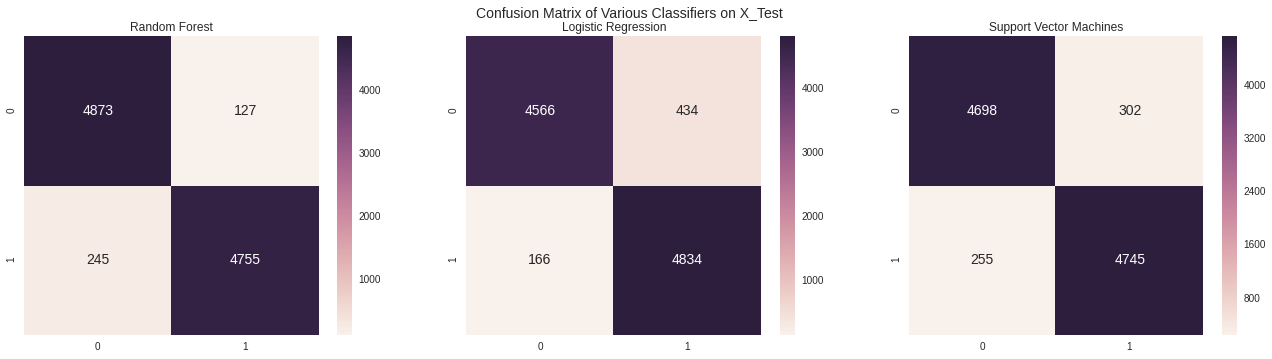

In [60]:
random_forest_conf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
logistic_reg_conf_matrix = metrics.confusion_matrix(y_test, lr.predict(X_test))
# grad_ens_conf_matrix = metrics.confusion_matrix(y_test, gbc.predict(X_test))
svm_svc_conf_matrix = metrics.confusion_matrix(y_test, svc.predict(X_test))

conf_matrix = {
                1: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                2: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
#                 3: {
#                     'matrix': grad_ens_conf_matrix,
#                     'title': 'Gradient Boosting Trees',
#                    },
                3: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machines',
                   }
}

fix, ax = plt.subplots(figsize=(20, 5))
plt.suptitle('Confusion Matrix of Various Classifiers on X_Test ')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(1, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

In [61]:
print "AUC of LR: {}, RF: {}, SVC: {}".format(metrics.roc_auc_score(y_test, lr.predict(X_test)),
                                              metrics.roc_auc_score(y_test, rf.predict(X_test)),
                                              metrics.roc_auc_score(y_test, svc.predict(X_test))
                                             )

AUC of LR: 0.94, RF: 0.9628, SVC: 0.9443


In [ ]:
print "AUC of LR: {}, RF: {}, GBC: {}, SVC: {}".format(metrics.roc_auc_score(y_test, lr.predict(X_test)),
                                              metrics.roc_auc_score(y_test, rf.predict(X_test)),
                                              metrics.roc_auc_score(y_test, gbc.predict(X_test)),
                                              metrics.roc_auc_score(y_test, svc.predict(X_test))
                                             )

## Testing on NEWSWIRE

In [67]:
START_NUM = 30000
TEST_NUM = 10000
wrong_dim_count = 0

vne_posts = []
for i in range(START_NUM, START_NUM + TEST_NUM):
    if i % 3 == 0:
        k = "r131_VN_{}".format(i)
    elif i % 3 == 1:
        k = "r131_TN_{}".format(i)
    else:
        k = "r131_ZN_{}".format(i)
        
    v = model.docvecs[k]
    size = v.shape
    if size[0] == 200: 
        vne_posts.append((k,v))
    else:
        wrong_dim_count += 1

In [68]:
print wrong_dim_count
print len(vne_posts)

0
10000


In [74]:
results = []
for i, (k, vec) in enumerate(vne_posts[:1000]):
    if i % 100 == 0: print "[*] Vec ", k
    results.append(list(voting_vec3(vec)))

[*] Vec  r131_VN_30000
[*] Vec  r131_TN_30100
[*] Vec  r131_ZN_30200
[*] Vec  r131_VN_30300
[*] Vec  r131_TN_30400
[*] Vec  r131_ZN_30500
[*] Vec  r131_VN_30600
[*] Vec  r131_TN_30700
[*] Vec  r131_ZN_30800
[*] Vec  r131_VN_30900


In [76]:
df_result = pd.DataFrame.from_records(np.asarray(results), columns=["LR", "RF", "SVC"])

In [77]:
df_result.head()

,LR,RF,SVC
0,[0.0],[0.0],[0.0]
1,[0.0],[0.0],[0.0]
2,[0.0],[0.0],[0.0]
3,[0.0],[0.0],[0.0]
4,[0.0],[0.0],[0.0]


In [79]:
df_result.describe()

,LR,RF,SVC
count,1000,1000,1000
unique,2,2,2
top,[0.0],[0.0],[0.0]
freq,895,972,919


## Testing on BLACK 30K +

In [82]:
START_NUM = 30000
TEST_NUM = 5000
wrong_dim_count = 0

black_posts = []
for i in range(START_NUM, START_NUM + TEST_NUM):
    k = "r131_PD_{}".format(i)
        
    v = model.docvecs[k]
    size = v.shape
    if size[0] == 200: 
        black_posts.append((k,v))
    else:
        wrong_dim_count += 1
        
print wrong_dim_count
print len(black_posts)

0
5000


In [83]:
results = []
for i, (k, vec) in enumerate(black_posts[:5000]):
    if i % 100 == 0: print "[*] Vec ", k
    results.append(list(voting_vec3(vec)))

df_result = pd.DataFrame.from_records(np.asarray(results), columns=["LR", "RF", "SVC"])
df_result.describe()

[*] Vec  r131_PD_30000
[*] Vec  r131_PD_30100
[*] Vec  r131_PD_30200
[*] Vec  r131_PD_30300
[*] Vec  r131_PD_30400
[*] Vec  r131_PD_30500
[*] Vec  r131_PD_30600
[*] Vec  r131_PD_30700
[*] Vec  r131_PD_30800
[*] Vec  r131_PD_30900
[*] Vec  r131_PD_31000
[*] Vec  r131_PD_31100
[*] Vec  r131_PD_31200
[*] Vec  r131_PD_31300
[*] Vec  r131_PD_31400
[*] Vec  r131_PD_31500
[*] Vec  r131_PD_31600
[*] Vec  r131_PD_31700
[*] Vec  r131_PD_31800
[*] Vec  r131_PD_31900
[*] Vec  r131_PD_32000
[*] Vec  r131_PD_32100
[*] Vec  r131_PD_32200
[*] Vec  r131_PD_32300
[*] Vec  r131_PD_32400
[*] Vec  r131_PD_32500
[*] Vec  r131_PD_32600
[*] Vec  r131_PD_32700
[*] Vec  r131_PD_32800
[*] Vec  r131_PD_32900
[*] Vec  r131_PD_33000
[*] Vec  r131_PD_33100
[*] Vec  r131_PD_33200
[*] Vec  r131_PD_33300
[*] Vec  r131_PD_33400
[*] Vec  r131_PD_33500
[*] Vec  r131_PD_33600
[*] Vec  r131_PD_33700
[*] Vec  r131_PD_33800
[*] Vec  r131_PD_33900
[*] Vec  r131_PD_34000
[*] Vec  r131_PD_34100
[*] Vec  r131_PD_34200
[*] Vec  r1

,LR,RF,SVC
count,5000,5000,5000
unique,2,2,2
top,[1.0],[1.0],[1.0]
freq,4816,4748,4652
